In [ ]:
import os
import sys

# Use the current working directory instead of __file__
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

import matplotlib.pyplot as plt
import pandas as pd
import hardware_control.wx_programs as wx
import hardware_control.bnc as bnc
from classes.generator import *
from hardware_control.hardware_config import *
from experiment_configuration.values import *
from classes.qubit_class import *
import daq.daq_programs_homo as daq
import seaborn as sns
import standard_sequences.pinopi as pnp


In [ ]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
print(f"{q1}\n{q2}")

Qubit(ro_dur=5000, mixer_offset_ef=6, ro_freq=6.72739, mixer_offset_ge=2.5, ro_amp=0.35, RO_LO=6.6247, ge_time=77, RO_IF=None, ef_ssm=-0.2568, ef_half_amp=1.31, ef_half_time=25, ROIF=0.10268999999999995, ef_amp=1.49, ef_time=44, ge_ssm=-0.1144, IQ_angle=60, qubit_id=q1, RO_LO_pwr=16, ge_amp=1.01, qubit_thr=[-10000, -600])
Qubit(ro_dur=5000, mixer_offset_ef=None, ro_freq=6.65554, mixer_offset_ge=None, ro_amp=0.45, RO_LO=6.6247, ge_time=74, RO_IF=None, ef_ssm=-0.2962, ef_half_amp=None, ef_half_time=None, ROIF=0.030840000000000423, ef_amp=1, ef_time=None, ge_ssm=-0.154, IQ_angle=25, qubit_id=q2, RO_LO_pwr=16, ge_amp=0.4, qubit_thr=[-10000, 1900])


In [ ]:
wx_addr = wx.get_wx_address()
main_directory = r"C:\Users\quantum1\Documents"
save_dir = rf"{main_directory}\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\data"
target_bnc_address_6 = "USB0::0x03EB::0xAFFF::411-433500000-0753::INSTR"
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=target_bnc_address_6
)
bnc.set_bnc_output(
    readout_dict["RO_LO"],
    power_dBm=readout_dict["RO_LO_pwr"],
    bnc_addr=bnc_address["target_bnc_black"],
)
bnc.set_bnc_output(
    general_vals_dict["TWPA_freq"],
    general_vals_dict["TWPA_pwr"],
    bnc_addr=bnc_address["big_agilent"],
)
num_steps = 3
reps = 5000
swap_freq= -.0194
swap_time=0.5*7/abs(swap_freq)



writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
Patterns: 3
Records per pattern: 5000
Buffers per acquistion: 5
DAQ samples per pattern: 8192
0, No error
Capturing 5 buffers. Press <enter> to abort
Capture completed in 2.794080 sec
Captured 5 buffers (1.789498 buffers per sec)
Captured 15360 records (5497.336721 records per sec)
Transferred 251658240 bytes (90068364.833857 bytes per sec)


<Figure size 800x800 with 0 Axes>

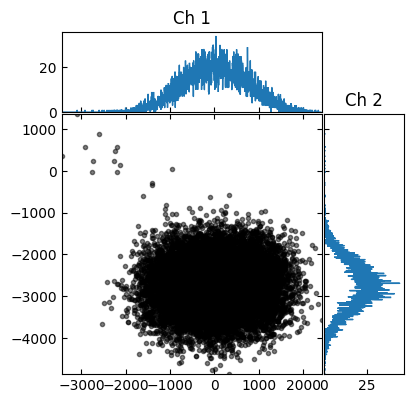

<Figure size 800x800 with 0 Axes>

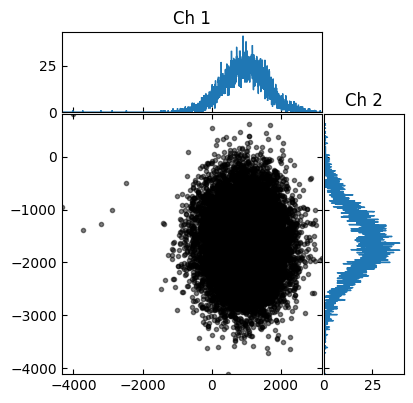

saved G
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
Patterns: 3
Records per pattern: 5000
Buffers per acquistion: 5
DAQ samples per pattern: 8192
0, No error
Capturing 5 buffers. Press <enter> to abort
Capture completed in 2.446546 sec
Captured 5 buffers (2.043697 buffers per sec)
Captured 15360 records (6278.237979 records per sec)
Transferred 251658240 bytes (102862651.051849 bytes per sec)


<Figure size 800x800 with 0 Axes>

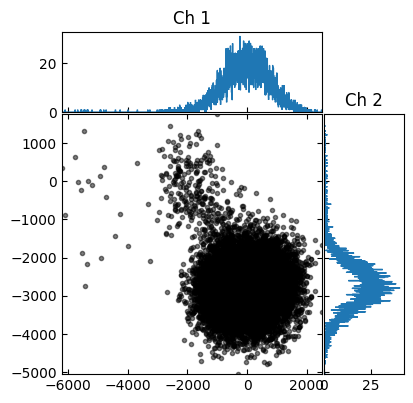

<Figure size 800x800 with 0 Axes>

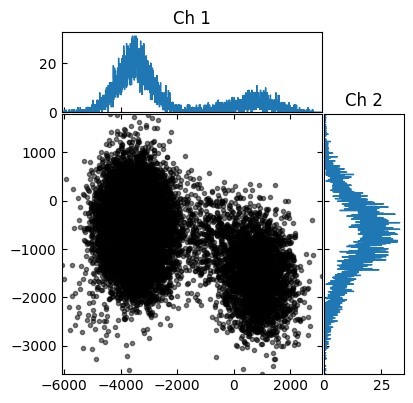

saved E
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
0, No error
10.225.208.207
0, No error
10.225.208.207
0, No error
Patterns: 3
Records per pattern: 5000
Buffers per acquistion: 5
DAQ samples per pattern: 8192
0, No error
Capturing 5 buffers. Press <enter> to abort
Capture completed in 2.664593 sec
Captured 5 buffers (1.876459 buffers per sec)
Captured 15360 records (5764.483162 records per sec)
Transferred 251658240 bytes (94445292.125290 bytes per sec)


<Figure size 800x800 with 0 Axes>

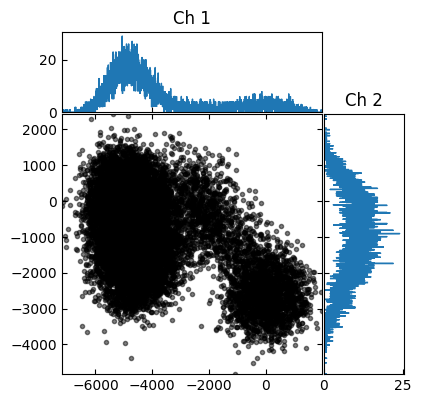

<Figure size 800x800 with 0 Axes>

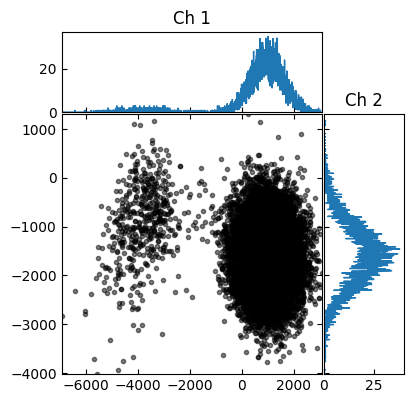

saved F


In [ ]:
phase = 0
swap_amp = 1.36  
for i in range(3):
    if 0 == i:
        label = "G"
        pnp.pi_nopi_swap(
            q1,
            q2,
            general_vals_dict,
            copief=0,
            coswap=1,
            copige=0,
            num_steps=3,
            swap_freq=swap_freq,
            swap_time=swap_time,
            phase=phase,
            swap_amp=swap_amp,
        )
    elif 1 == i:
        label = "E"
        # E prep
        pnp.pi_nopi_swap(
            q1,
            q2,
            general_vals_dict,
            copief=0,
            coswap=1,
            copige=1,
            num_steps=3,
            swap_freq=swap_freq,
            swap_time=swap_time,
            phase=phase,
            swap_amp=swap_amp,
        )
    elif 2 == i:
        label = "F"
        # F prep
        pnp.pi_nopi_swap(
            q1,
            q2,
            general_vals_dict,
            copief=1,
            coswap=1,
            copige=1,
            num_steps=3,
            swap_freq=swap_freq,
            swap_time=swap_time,
            phase=phase,
            swap_amp=swap_amp,
        )

    wx.wx_set_and_amplitude_and_offset(
        amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
    )
    values = daq.run_daq_het_2q(
        q1, q2, num_patterns=num_steps, num_records_per_pattern=reps, verbose=True
    )

    # Retrieve raw IQ data from the acquired values
    I1_raw = values.rec_readout_1[0][0 : reps * num_steps]
    Q1_raw = values.rec_readout_1[1][0 : reps * num_steps]
    I2_raw = values.rec_readout_2[0][0 : reps * num_steps]
    Q2_raw = values.rec_readout_2[1][0 : reps * num_steps]

    # Build a DataFrame from the IQ data for classification
    IQ_df = pd.DataFrame({"I1": I1_raw, "Q1": Q1_raw, "I2": I2_raw, "Q2": Q2_raw})
    if 0 == i:
        g_IQ = IQ_df
    elif 1 == i:
        e_IQ = IQ_df
    else:
        f_IQ = IQ_df
    IQ_df.to_csv(f"IQraw{label}.csv")
    print(f"saved {label}")

In [ ]:
g_IQ["label"] = [0 for _ in range(len(g_IQ))]
e_IQ["label"] = [1 for _ in range(len(e_IQ))]
f_IQ["label"] = [2 for _ in range(len(f_IQ))]

three_state = pd.concat([g_IQ, e_IQ, f_IQ], axis=0)
try:
    three_state = three_state.drop(columns="Unnamed: 0")
except:
    pass
three_state = three_state.sample(frac=1).reset_index(drop=True)
three_state.head()

three_state.to_csv("three_state.csv")

print("saved three_state")

saved three_state


In [ ]:
current_dir = os.getcwd()

if "three_state.csv" in os.listdir(current_dir):
    print("three_state.csv in current directory")

    for file in ["IQrawE.csv", "IQrawF.csv", "IQrawG.csv"]:
        try:
            os.remove(file)
        except FileNotFoundError:
            print(f"No {file}")

else:
    print("three_state.csv not in current directory")

data_dir = "training_and_test_data"

# Ensure 'three_state.csv' exists before moving
if os.path.exists("three_state.csv"):
    try:
        os.remove(os.path.join(data_dir, "three_state.csv"))
        print("Removed existing three_state.csv from training_and_test_data")
    except FileNotFoundError:
        pass
    os.rename("three_state.csv", os.path.join(data_dir, "three_state.csv"))
    print("Moved three_state.csv to training_and_test_data")
else:
    print("Error: three_state.csv not found in the current directory")

three_state.csv in current directory
Removed existing three_state.csv from training_and_test_data
Moved three_state.csv to training_and_test_data


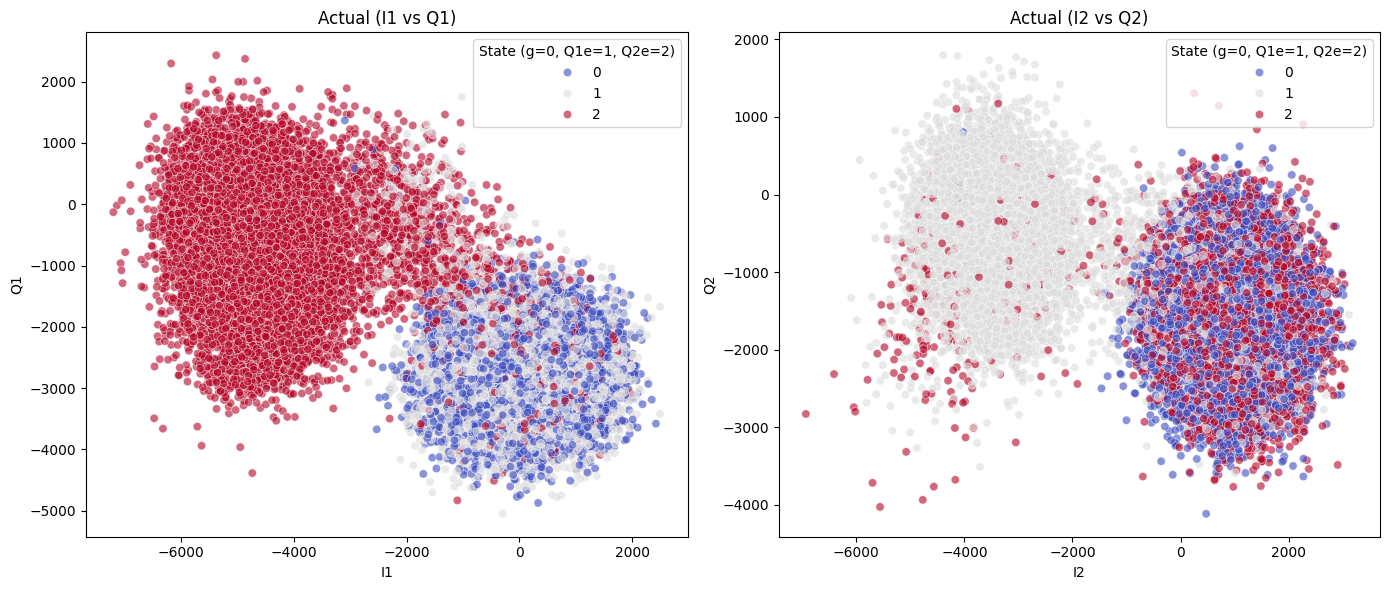

In [ ]:
# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sliced_data = three_state
# First subplot: I1 vs Q1
sns.scatterplot(
    data=sliced_data,
    x="I1",
    y="Q1",
    hue="label",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[0],
)
axes[0].set_xlabel("I1")
axes[0].set_ylabel("Q1")
axes[0].set_title("Actual (I1 vs Q1)")
axes[0].legend(title="State (g=0, Q1e=1, Q2e=2)", loc="upper right")

# Second subplot: I2 vs Q2
sns.scatterplot(
    data=sliced_data,
    x="I2",
    y="Q2",
    hue="label",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[1],
)
axes[1].set_xlabel("I2")
axes[1].set_ylabel("Q2")
axes[1].set_title("Actual (I2 vs Q2)")
axes[1].legend(title="State (g=0, Q1e=1, Q2e=2)", loc="upper right")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()